## Learning Objectives:
- [A Step-by-Step Illustration of $k$-NN Classification](#A-Step-by-Step-Illustration-of-$k$-NN-Classification)
  - [Step1: Load Example Data](#Step1:-Load-Example-Data)
  - [Step2: Data Split](#Step2:-Data-Split)
  - [Step3: Use $k$-NN Model to Make Predictions](#Step3:-Use-$k$-NN-Model-to-Make-Predictions)
  - [Step4: Compariosn of Classification Results with Different $k$ and Distance Metrics](#Step4:-Compariosn-of-Classification-Results-with-Different-$k$-and-Distance-Metrics)
  - [Step5: Visualize Various Decision Boundaries](#Step5:-Visualize-Various-Decision-Boundaries)

#### Adapted from the Code Repository: 
- Sebastian Raschka. Python Machine Learning Book 2nd Edition. 
  - https://github.com/rasbt/python-machine-learning-book-2nd-edition/tree/master/code/ch02
- $k$-NN from scratch: https://github.com/remziorak/kNearestNeighbors

In [1]:
#!pip install prettytable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from prettytable import PrettyTable

# A Step-by-Step Illustration of $k$-NN Classification

In [2]:
class KNeighborsClassifier:

    def __init__(self, n_neighbors=5, distance_metric='Euclidean'):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for feature in range(len(X_test)):
            label = self.findNearestNeighbor(X_test[feature, :])[0]
            # adds the predicted label into the predictions array
            predictions.append(label)
        return predictions

    def euclidean_distance(self, X_train, feature):
        return np.sqrt(np.sum((np.array(X_train) - np.array(feature))**2))

    def manhattan_distance(self, u, v):
        manhattan_distance = np.sum(np.abs(np.array(u) - np.array(v)))
        return manhattan_distance

    def cosine_distance(self, u, v):
        uv = np.average(u * v,)
        uu = np.average(np.square(u))
        vv = np.average(np.square(v))
        cosine_distance = 1.0 - uv / np.sqrt(uu * vv)
        return cosine_distance

    def findNearestNeighbor(self, feature):

        distances = []
        labels = []
        if self.distance_metric == 'Euclidean':
            for i in range(len(self.X_train)):
                distances.append(self.euclidean_distance(self.X_train[i, :], feature))
                labels.append(str(self.y_train[i]))

        elif self.distance_metric == 'Manhattan':
            for i in range(len(self.X_train)):
                distances.append(self.manhattan_distance(self.X_train[i, :], feature))
                labels.append(str(self.y_train[i]))

        elif self.distance_metric == 'Cosine':
            for i in range(len(self.X_train)):
                distances.append(self.cosine_distance(self.X_train[i, :], feature))
                labels.append(str(self.y_train[i]))

        else:
            print("Non-valid distance metric!!!\nDistance metrics : "
                  "'Euclidean', 'Manhattan', 'Cosine'")
            return

        sorted_list = sorted(zip(distances, labels), reverse=False)[:self.n_neighbors]
        most_nearest_labels = list(zip(*sorted_list))[1]
        # counts elements in nearest labels array
        count = Counter(most_nearest_labels)
        return count.most_common()[0]  # return the most common label

    def accuracy(self, y_test, y_predicted):
        correct_prediction = 0
        wrong_prediction = 0
        total_prediction = 0
        for i in range(len(y_test)):
            if str(y_test[i]) == y_predicted[i]:
                correct_prediction += 1
            else:
                wrong_prediction += 1
            total_prediction += 1
        accuracy = (correct_prediction / float(total_prediction)) * 100.0
        return (self.n_neighbors, accuracy, wrong_prediction)

    def draw_decision_boundaries(self):
        # Find each point on coordinate space
        x_min, x_max = self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1
        y_min, y_max = self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1
        h = .05  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.reshape(Z, xx.shape)

        space_color_list = []  # create color list for space

        # map each point on coordinate to a color according its label    
        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                if str(Z[i][j]) == "0":
                    space_color_list.append('#ddecff')
                elif str(Z[i][j]) == "1":
                    space_color_list.append('#FFFFDD')
                elif str(Z[i][j]) == "2":
                    space_color_list.append('#DDFFDD')

        plt.figure()

        # plot each point on space
        plt.scatter(xx, yy, marker='o', c=space_color_list)
        
        # Plot also the training points
        plt.scatter(self.X_train[self.y_train == 0, 0],
                    self.X_train[self.y_train == 0, 1],
                    marker='o',
                    label='class 0 (Setosa)')

        plt.scatter(self.X_train[self.y_train == 1, 0],
                    self.X_train[self.y_train == 1, 1],
                    marker='^',
                    label='class 1 (Versicolor)')

        plt.scatter(self.X_train[self.y_train == 2, 0],
                    self.X_train[self.y_train == 2, 1],
                    marker='s',
                    label='class 2 (Virginica)') 
#         plt.scatter(self.X_train[:, [0]], self.X_train[:, [1]], marker='o', c=colors)

        plt.title('Decision Boundaries\n(k = {}  Distance = {})'.format(self.n_neighbors,
                                                                        self.distance_metric))
        plt.xlabel('petal length [cm]')
        plt.ylabel('petal width [cm]')
        plt.legend(loc='upper left')
        plt.xlim(self.X_train[:, 0].min() - 0.5, self.X_train[:, 0].max() + 0.5)
        plt.ylim(self.X_train[:, 1].min() - 0.5, self.X_train[:, 1].max() + 0.5)
        plt.draw()





### Step1: Load Example Data

In [4]:
filename = './iris.csv'

# assign dataframe to the variable : data
df_iris = pd.read_csv('iris.csv')
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [6]:
# grouped values by their class label
grouped_data = df_iris.groupby(['ClassLabel'])
grouped_data_df = grouped_data.apply(lambda x: x)
grouped_data_df.tail()


,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


### Step2: Data Split

In [7]:
# for training we select first 30 row of each group in our dataset and last 20 rows of each group for testing
train_rows = [i for i in range(150) if ((i < 30) or (80 > i > 49) or (130 > i > 99))]
test_rows = [i for i in range(150) if (not((i < 30) or (80 > i > 49) or (130 > i > 99)))]
X_train = np.array(grouped_data_df.iloc[train_rows, [1, 4]])
y_train = np.array(grouped_data_df.iloc[train_rows, [6]]).flatten()
X_test = np.array(grouped_data_df.iloc[test_rows, [1, 4]])
y_test = np.array(grouped_data_df.iloc[test_rows, [6]]).flatten()


In [8]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')


X_train.shape: (90, 2)
y_train.shape: (90,)
X_test.shape: (60, 2)
y_test.shape: (60,)


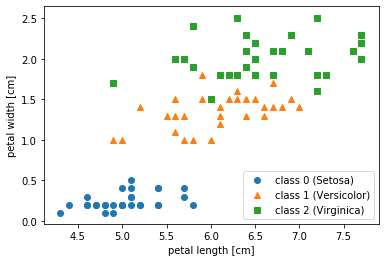

In [9]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='lower right')



### Step3: Use $k$-NN Model to Make Predictions
After "fitting" the KNN model, we can now make predictions on new data points that the model has not seen before. The test set represents such data points. Of course, we have labels for the test set as well, but we only use these labels to evaluate the model. Namely, we compare the predictions with the true labels in the test set in order to find out how good the model is:

In [10]:
k_numbers_list = [ i for i in range(16) if i%2 == 1]  # Creates odd k number from 1 to 15

euclidean_results = []
manhattan_results = []
cosine_results = []

# calculate accuracy and error count for each k and euclidean distance
for i in k_numbers_list:
        clf = KNeighborsClassifier(i, 'Euclidean')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        euclidean_results.append(clf.accuracy(y_test, predictions))

# calculate accuracy and error count for each k and manhattan distance
for i in k_numbers_list:
        clf = KNeighborsClassifier(i, 'Manhattan')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        manhattan_results.append(clf.accuracy(y_test, predictions))

# calculate accuracy and error count for each k and cosine distance
for i in k_numbers_list:
        clf = KNeighborsClassifier(i, 'Cosine')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        cosine_results.append(clf.accuracy(y_test, predictions))




### Step4: Compariosn of Classification Results with Different $k$ and Distance Metrics

In [11]:
euc_table = PrettyTable()
euc_table.field_names = ["k", "Euclidean Accuracy", "Euclidean Error Count"]

# fill values for Euclidean table
for index in range(len(euclidean_results)):
    euc_table.add_row(euclidean_results[index])


man_table = PrettyTable()
man_table.field_names = ["k", "Manhattan Accuracy", "Manhattan Error Count"]

# fill values for Manhattan table
for index in range(len(manhattan_results)):
    man_table.add_row(manhattan_results[index])

cos_table = PrettyTable()
cos_table.field_names = ["k", "Cosine Accuracy", "Cosine Error Count"]

# fill values for Cosine table
for index in range(len(cosine_results)):
    cos_table.add_row(cosine_results[index])

print(euc_table)   # Print Euclidean table
print('\n')
print(man_table)  # Print Manhattan table
print('\n')
print(cos_table)  # Print Cosine table

+----+--------------------+-----------------------+
| k  | Euclidean Accuracy | Euclidean Error Count |
+----+--------------------+-----------------------+
| 1  | 93.33333333333333  |           4           |
| 3  | 96.66666666666667  |           2           |
| 5  | 96.66666666666667  |           2           |
| 7  | 96.66666666666667  |           2           |
| 9  | 96.66666666666667  |           2           |
| 11 | 96.66666666666667  |           2           |
| 13 | 96.66666666666667  |           2           |
| 15 | 96.66666666666667  |           2           |
+----+--------------------+-----------------------+


+----+--------------------+-----------------------+
| k  | Manhattan Accuracy | Manhattan Error Count |
+----+--------------------+-----------------------+
| 1  | 93.33333333333333  |           4           |
| 3  | 96.66666666666667  |           2           |
| 5  | 96.66666666666667  |           2           |
| 7  | 96.66666666666667  |           2           |
| 9  | 96.

### Step5: Visualize Various Decision Boundaries

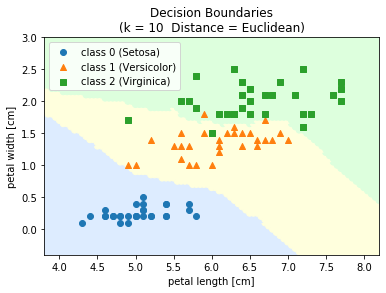

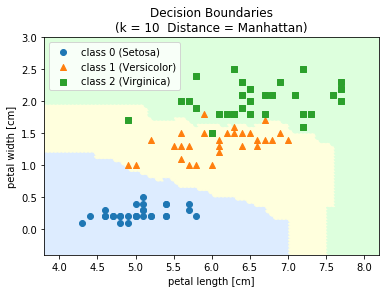

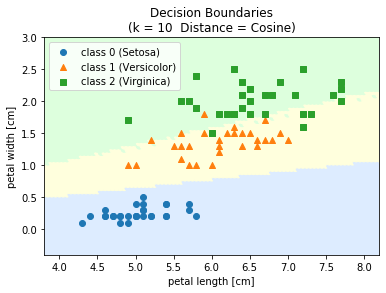

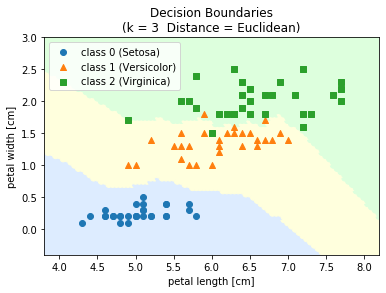

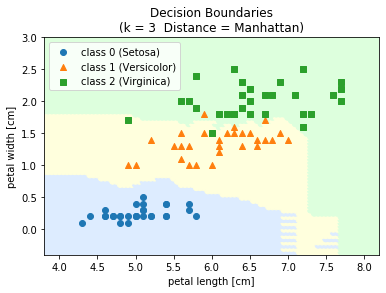

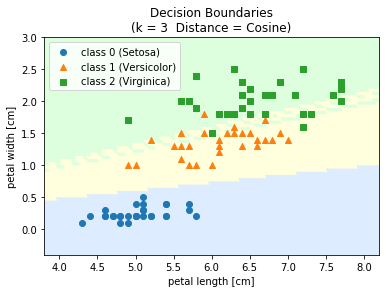

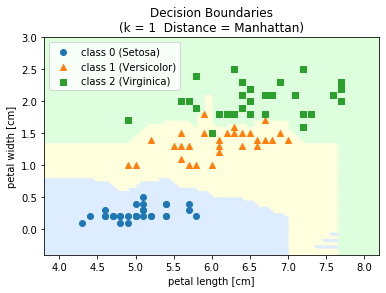

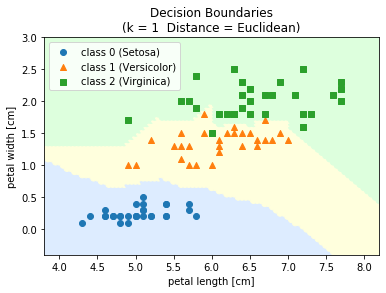

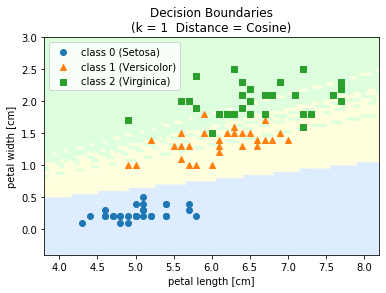

In [13]:
# create an instance of KNeighborsClassifier for k = 10, euclidean distance
clf = KNeighborsClassifier(10, distance_metric='Euclidean')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()

# create an instance of KNeighborsClassifier for k = 10, euclidean distance
clf = KNeighborsClassifier(10, distance_metric='Manhattan')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()

# create an instance of KNeighborsClassifier for k = 10, cosine distance
clf = KNeighborsClassifier(10, distance_metric='Cosine')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()


# # create an instance of KNeighborsClassifier for k = 3, euclidean distance
clf = KNeighborsClassifier(3, distance_metric='Euclidean')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()


# # create an instance of KNeighborsClassifier for k = 3, euclidean distance
clf = KNeighborsClassifier(3, distance_metric='Manhattan')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()


# create an instance of KNeighborsClassifier for k = 3, cosine distance
clf = KNeighborsClassifier(3, distance_metric='Cosine')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()


# create an instance of KNeighborsClassifier for k = 1, manhattan distance
clf = KNeighborsClassifier(1, distance_metric='Manhattan')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()


# create an instance of KNeighborsClassifier for k = 1, euclidean distance
clf = KNeighborsClassifier(1, distance_metric='Euclidean')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()

# create an instance of KNeighborsClassifier for k = 1, cosine distance
clf = KNeighborsClassifier(1, distance_metric='Cosine')
clf.fit(X_train,y_train)
clf.draw_decision_boundaries()

plt.show()